In [17]:
import torch

In [18]:
import torch.nn as nn

In [17]:
import pandas as pd

In [112]:
all_data = pd.read_csv('/data/huangshuyan/pykt-toolkit/data/statics2011/train_valid_sequences.csv')

In [113]:
all_data

,fold,uid,concepts,responses,timestamps,selectmasks
0,0,51,"71,72,74,73,75,740,741,742,743,744,745,169,746...","1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,...","1315200540000,1315200540000,1315200540000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
1,0,51,"760,761,762,763,764,765,766,767,768,769,770,89...","1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,...","1315210920000,1315210920000,1315210920000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
2,0,51,"26,24,25,27,28,29,30,31,32,33,34,35,36,37,38,3...","1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","1315228920000,1315228920000,1315228920000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3,0,51,"771,150,772,149,157,154,773,153,156,152,155,15...","0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,...","1315242900000,1315242900000,1315242900000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
4,0,51,"197,774,775,202,201,199,203,204,205,206,207,20...","1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,...","1315836000000,1315836120000,1315836240000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...,...,...,...,...,...
3197,4,126,"1034,1035,1036,1037,1038,1039,1040,555,556,815...","1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,...","1318255740000,1318255800000,1318255800000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3198,4,126,"608,609,610,615,616,614,617,618,619,620,621,62...","0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,0,1,...","1318861680000,1318861680000,1318861680000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3199,4,126,"660,663,659,661,662,667,666,665,664,668,674,68...","1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,...","1319460600000,1319460600000,1319460600000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3200,4,126,"881,882,883,884,885,886,887,888,889,918,945,94...","1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,-1,-1,-1,-...","1320064620000,1320064620000,1320064680000,1320...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-..."


In [28]:
all_data[1:65]

,fold,uid,concepts,responses,timestamps,selectmasks
1,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"197,774,775,202,201,199,203,204,205,206,207,20...","1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,...","1315836000000,1315836120000,1315836240000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
2,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"390,391,392,393,394,395,396,397,398,399,400,40...","1,0,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,0,...","1317051840000,1317051840000,1317051840000,1317...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"566,567,568,569,570,571,572,1048,1049,831,832,...","1,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,...","1318265160000,1318265160000,1318265160000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
4,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"730,731,732,733,734,735,736,737,738,739,1104,1...","0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,...","1319471700000,1319471700000,1319472360000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
5,0,Stu_272bb2efdda554e7d9ad5001f460f68e,"71,72,74,73,75,169,76,750,751,752,77,78,953,79...","1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,0,...","1314853560000,1314853560000,1314853560000,1314...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...,...,...,...,...,...
60,0,Stu_8ef20201f8f158cb4ddda810213e364e,"248,250,251,252,253,255,256,257,258,259,260,26...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...","1316481660000,1316481660000,1316481660000,1316...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
61,0,Stu_8ef20201f8f158cb4ddda810213e364e,"421,430,431,432,433,434,435,436,437,446,447,44...","1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,...","1318251120000,1318251600000,1318251660000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
62,0,Stu_8ef20201f8f158cb4ddda810213e364e,"643,641,642,644,645,646,649,648,647,651,650,65...","0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,...","1319462820000,1319462820000,1319462820000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
63,0,Stu_4ea9a900d49f88ea6f5f5877c7419925,"71,72,74,73,75,169,76,750,751,752,77,78,953,79...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,...","1314082320000,1314082320000,1314082380000,1314...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


In [29]:
extract_data = all_data[1:65]
extract_data

,fold,uid,concepts,responses,timestamps,selectmasks
1,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"197,774,775,202,201,199,203,204,205,206,207,20...","1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,...","1315836000000,1315836120000,1315836240000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
2,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"390,391,392,393,394,395,396,397,398,399,400,40...","1,0,1,0,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,0,...","1317051840000,1317051840000,1317051840000,1317...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"566,567,568,569,570,571,572,1048,1049,831,832,...","1,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,...","1318265160000,1318265160000,1318265160000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
4,0,Stu_2a2cb03b6b65e8e94b060849473ebec0,"730,731,732,733,734,735,736,737,738,739,1104,1...","0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,...","1319471700000,1319471700000,1319472360000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
5,0,Stu_272bb2efdda554e7d9ad5001f460f68e,"71,72,74,73,75,169,76,750,751,752,77,78,953,79...","1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,0,...","1314853560000,1314853560000,1314853560000,1314...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...,...,...,...,...,...
60,0,Stu_8ef20201f8f158cb4ddda810213e364e,"248,250,251,252,253,255,256,257,258,259,260,26...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...","1316481660000,1316481660000,1316481660000,1316...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
61,0,Stu_8ef20201f8f158cb4ddda810213e364e,"421,430,431,432,433,434,435,436,437,446,447,44...","1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,...","1318251120000,1318251600000,1318251660000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
62,0,Stu_8ef20201f8f158cb4ddda810213e364e,"643,641,642,644,645,646,649,648,647,651,650,65...","0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,...","1319462820000,1319462820000,1319462820000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
63,0,Stu_4ea9a900d49f88ea6f5f5877c7419925,"71,72,74,73,75,169,76,750,751,752,77,78,953,79...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,...","1314082320000,1314082320000,1314082380000,1314...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


In [25]:
extract_data["concepts"].tolist()

['390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,354,355,356,357,358,359,360,361,179,178,180,417,418,419,420,421,422,423,424,425,426,427,428,429,438,439,440,441,442,443,444,445,792,793,794,795,796,447,449,450,452,1019,1020,1021,1022,1023,453,454,455,456,457,460,461,462,463,1024,807,467,468,470,469,475,476,477,807,466,807,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,808,809,810,811,812,813,510,511,513,514,515,516,517,518,519,520,521,522,523,524,526,525,527,528,814,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,1033,1034,1035,1036,1037,1038,1039,1040,555,556,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,557,558,559,560,561,562,563,564,565,1041,1042,1043,1044,1045,1046,1047']

In [31]:
extract_data.to_csv("/data/huangshuyan/pykt-toolkit/data/statics2011/train_valid_sequences.csv")

In [114]:
df = all_data

In [115]:
df["symbol"] = ","

In [116]:
df["padding"] = ",".join([str(-1)]*150)

In [96]:
df

,fold,uid,concepts,responses,timestamps,selectmasks,symbol,padding
0,0,51,"71,72,74,73,75,740,741,742,743,744,745,169,746...","1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,...","1315200540000,1315200540000,1315200540000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
1,0,51,"760,761,762,763,764,765,766,767,768,769,770,89...","1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,...","1315210920000,1315210920000,1315210920000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
2,0,51,"26,24,25,27,28,29,30,31,32,33,34,35,36,37,38,3...","1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","1315228920000,1315228920000,1315228920000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3,0,51,"771,150,772,149,157,154,773,153,156,152,155,15...","0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,...","1315242900000,1315242900000,1315242900000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
4,0,51,"197,774,775,202,201,199,203,204,205,206,207,20...","1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,...","1315836000000,1315836120000,1315836240000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
...,...,...,...,...,...,...,...,...
3197,4,126,"1034,1035,1036,1037,1038,1039,1040,555,556,815...","1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,...","1318255740000,1318255800000,1318255800000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3198,4,126,"608,609,610,615,616,614,617,618,619,620,621,62...","0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,0,1,...","1318861680000,1318861680000,1318861680000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3199,4,126,"660,663,659,661,662,667,666,665,664,668,674,68...","1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,...","1319460600000,1319460600000,1319460600000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3200,4,126,"881,882,883,884,885,886,887,888,889,918,945,94...","1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,-1,-1,-1,-...","1320064620000,1320064620000,1320064680000,1320...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."


In [117]:
df["concepts"] = df["concepts"] + df["symbol"] + df["padding"]
df["responses"] = df["responses"] + df["symbol"] + df["padding"]
df["timestamps"] = df["timestamps"] + df["symbol"] + df["padding"]

In [118]:
df

,fold,uid,concepts,responses,timestamps,selectmasks,symbol,padding
0,0,51,"71,72,74,73,75,740,741,742,743,744,745,169,746...","1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,...","1315200540000,1315200540000,1315200540000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
1,0,51,"760,761,762,763,764,765,766,767,768,769,770,89...","1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,...","1315210920000,1315210920000,1315210920000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
2,0,51,"26,24,25,27,28,29,30,31,32,33,34,35,36,37,38,3...","1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","1315228920000,1315228920000,1315228920000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3,0,51,"771,150,772,149,157,154,773,153,156,152,155,15...","0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,...","1315242900000,1315242900000,1315242900000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
4,0,51,"197,774,775,202,201,199,203,204,205,206,207,20...","1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,...","1315836000000,1315836120000,1315836240000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
...,...,...,...,...,...,...,...,...
3197,4,126,"1034,1035,1036,1037,1038,1039,1040,555,556,815...","1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,...","1318255740000,1318255800000,1318255800000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3198,4,126,"608,609,610,615,616,614,617,618,619,620,621,62...","0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,1,1,1,1,1,0,1,...","1318861680000,1318861680000,1318861680000,1318...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3199,4,126,"660,663,659,661,662,667,666,665,664,668,674,68...","1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,...","1319460600000,1319460600000,1319460600000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3200,4,126,"881,882,883,884,885,886,887,888,889,918,945,94...","1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,-1,-1,-1,-...","1320064620000,1320064620000,1320064680000,1320...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-...",",","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."


In [119]:
df["concepts"].tolist()

['71,72,74,73,75,740,741,742,743,744,745,169,746,747,748,749,76,750,751,752,170,171,172,173,174,175,176,177,77,78,953,79,80,81,954,82,83,84,753,85,86,87,955,88,754,755,756,757,758,759,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1',
 '760,761,762,763,764,765,766,767,768,769,770,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,21,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

In [120]:
df.to_csv('/data/huangshuyan/pykt-toolkit/data/statics2011/train_valid_sequences.csv')

In [121]:
test_df = pd.read_csv('/data/huangshuyan/pykt-toolkit/data/statics2011/test_sequences.csv')

In [122]:
test_df["padding"] = ",".join([str(-1)]*150)

In [123]:
test_df["concepts"] = test_df["concepts"] + "," + test_df["padding"]
test_df["responses"] = test_df["responses"] + "," + test_df["padding"]
test_df["timestamps"] = test_df["timestamps"] + "," + test_df["padding"]

In [124]:
test_df

,fold,uid,concepts,responses,timestamps,selectmasks,cidxs,padding
0,-1,31,"71,72,74,73,75,169,76,750,751,752,77,78,953,79...","1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,...","1315216620000,1315216620000,1315216620000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
1,-1,31,"9,10,11,12,13,14,15,16,17,18,19,20,36,37,38,39...","1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,-1,-1,-1,-1,-1...","1321244700000,1321244700000,1321244700000,1321...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1...","50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,6...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
2,-1,249,"71,72,74,73,75,740,741,742,743,744,745,169,746...","1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,...","1314869400000,1314869400000,1314869400000,1314...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,8...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
3,-1,249,"15,16,17,18,19,20,70,69,68,67,66,65,64,63,62,6...","1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,...","1314891960000,1314891960000,1314891960000,1314...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","116,117,118,119,120,121,122,123,124,125,126,12...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
4,-1,249,"129,130,131,132,133,134,135,136,137,138,139,16...","1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,1,1,...","1315641600000,1315641600000,1315641660000,1315...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","166,167,168,169,170,171,172,173,174,175,176,17...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
...,...,...,...,...,...,...,...,...
731,-1,97,"634,635,636,637,638,639,640,642,643,641,645,64...","1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,...","1319364480000,1319364540000,1319364540000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","34983,34984,34985,34986,34987,34988,34989,3499...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
732,-1,97,"669,691,690,689,688,687,686,685,684,683,682,68...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","1319365260000,1319365320000,1319365380000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","35033,35034,35035,35036,35037,35038,35039,3504...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
733,-1,97,"727,728,729,730,731,732,733,734,735,736,737,73...","0,1,0,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,...","1319367360000,1319367360000,1319367420000,1319...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","35083,35084,35085,35086,35087,35088,35089,3509...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
734,-1,97,"916,917,1104,1105,1106,1107,1108,918,919,1109,...","1,0,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,...","1320061500000,1320061500000,1320061680000,1320...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...","35133,35134,35135,35136,35137,35138,35139,3514...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."


In [110]:
test_df["concepts"].tolist()

['71,72,74,73,75,169,76,750,751,752,77,78,953,79,80,81,954,82,83,84,753,85,86,87,955,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,0,1,2,3,4,5,6,7,8,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1',
 '9,10,11,12,13,14,15,16,17,18,19,20,36,37,38,39,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

In [125]:
test_df.to_csv('/data/huangshuyan/pykt-toolkit/data/statics2011/test_sequences.csv')

In [126]:
def pmf(x,p):
    f = p**x*(1-p)**(1-x)
    return f

In [129]:
pmf(0.5, 0.9)

0.29999999999999993

In [130]:
import numpy as np

#伯努利类
 
class bernoulli():
    def pmf(x,p):
        """
        概率质量函数        
        """
        f = p**x*(1-p)**(1-x)
        return f
    
    def mean(p):
        """
        随机变量的期望值
        """
        return p
    
    def var(p):
        """
        随机变量的方差
        """
        return p*(1-p)
    
    def std(p):
        """
        随机变量的标准差
        """
        return bernoulli.var(p)**(1/2)
    
    def rvs(p,size=1):
        """
        随机变量
        """
        rvs = np.array([])
        for i in range(0,size):
            if np.random.rand() <= p:
                a=1
                rvs = np.append(rvs,a)
            else:
                a=0
                rvs = np.append(rvs,a)
        return rvs

In [424]:
p=[0.2] # 发生事故的概率

bernoulli.mean(p) # 返回 -> 0.2
bernoulli.var(p) # 返回  -> 0.16
bernoulli.std(p) # 返回  -> 0.4

# 每次执行生成随机数，因此数组可能会改变
bernoulli.rvs(p,size=10) 

TypeError: mean() takes 1 positional argument but 2 were given

In [136]:
d_output = torch.rand(2, 3, 4)

In [138]:
d_ones = torch.ones(1, 1).expand_as(d_output)
d_ones

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [143]:
ls = list(range(6))
ls

[0, 1, 2, 3, 4, 5]

In [154]:
a = torch.rand(1,3)
a

tensor([[0.9976, 0.1881, 0.9023]])

In [156]:
b = torch.rand(1,3)
b

tensor([[0.3157, 0.6115, 0.1239]])

In [157]:
a * b

tensor([[0.3150, 0.1150, 0.1118]])

In [145]:
b = torch.reshape(a,[2, 3])
b

tensor([[0, 1, 2],
        [3, 4, 5]])

In [152]:
loss = torch.reshape(a,[2, 3, 1])
loss

tensor([[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]])

In [153]:
_loss = torch.squeeze(loss)
_loss

tensor([[0, 1, 2],
        [3, 4, 5]])

In [158]:
input_x = torch.arange(1,7).reshape(2,3)
input_x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [166]:
x_emb = torch.rand(2,3,4)
x_emb

tensor([[[0.3718, 0.3097, 0.0658, 0.8961],
         [0.6080, 0.0255, 0.9836, 0.6631],
         [0.4588, 0.7484, 0.3115, 0.2228]],

        [[0.6576, 0.1518, 0.0487, 0.3942],
         [0.2338, 0.9407, 0.7742, 0.7343],
         [0.9403, 0.7706, 0.2254, 0.8347]]])

In [161]:
from torch.nn import LSTM

In [175]:
lstm_layer = LSTM(4, 5, batch_first=True, bidirectional=True)
lstm_layer

LSTM(4, 5, batch_first=True, bidirectional=True)

In [178]:
output, (h,c) = lstm_layer(x_emb)
output

tensor([[[ 1.9813e-01, -1.2101e-01,  3.8157e-02, -1.3148e-02, -1.1717e-01,
           8.5947e-02,  1.1371e-02, -1.8534e-01, -2.2337e-01,  1.6944e-02],
         [ 2.6640e-01, -1.3416e-01,  4.1702e-02, -4.6910e-02, -1.9876e-01,
           5.7365e-02, -7.9948e-02, -1.7307e-01, -1.6088e-01, -1.5576e-02],
         [ 2.8462e-01, -2.1108e-01,  3.8340e-02, -5.3976e-04, -1.9993e-01,
           7.2450e-02, -3.1709e-02, -1.0543e-01, -5.2041e-02,  2.0165e-02]],

        [[ 1.8581e-01, -1.0847e-01,  1.1757e-02,  2.3075e-05, -1.2795e-01,
           1.2292e-01, -3.9355e-02, -1.9290e-01, -2.4479e-01,  3.8014e-02],
         [ 2.7501e-01, -2.0714e-01,  6.6829e-02, -7.4580e-03, -1.9185e-01,
           9.0273e-02, -1.4052e-02, -1.7552e-01, -1.8185e-01, -1.7454e-02],
         [ 3.6952e-01, -2.2775e-01,  5.0926e-02,  1.6329e-02, -2.0841e-01,
           9.6310e-02,  1.2042e-02, -1.4610e-01, -1.1130e-01,  1.7390e-03]]],
       grad_fn=<TransposeBackward0>)

In [185]:
output_reshape = torch.reshape(output,(2,6,5))
output_reshape

tensor([[[ 1.9813e-01, -1.2101e-01,  3.8157e-02, -1.3148e-02, -1.1717e-01],
         [ 8.5947e-02,  1.1371e-02, -1.8534e-01, -2.2337e-01,  1.6944e-02],
         [ 2.6640e-01, -1.3416e-01,  4.1702e-02, -4.6910e-02, -1.9876e-01],
         [ 5.7365e-02, -7.9948e-02, -1.7307e-01, -1.6088e-01, -1.5576e-02],
         [ 2.8462e-01, -2.1108e-01,  3.8340e-02, -5.3976e-04, -1.9993e-01],
         [ 7.2450e-02, -3.1709e-02, -1.0543e-01, -5.2041e-02,  2.0165e-02]],

        [[ 1.8581e-01, -1.0847e-01,  1.1757e-02,  2.3075e-05, -1.2795e-01],
         [ 1.2292e-01, -3.9355e-02, -1.9290e-01, -2.4479e-01,  3.8014e-02],
         [ 2.7501e-01, -2.0714e-01,  6.6829e-02, -7.4580e-03, -1.9185e-01],
         [ 9.0273e-02, -1.4052e-02, -1.7552e-01, -1.8185e-01, -1.7454e-02],
         [ 3.6952e-01, -2.2775e-01,  5.0926e-02,  1.6329e-02, -2.0841e-01],
         [ 9.6310e-02,  1.2042e-02, -1.4610e-01, -1.1130e-01,  1.7390e-03]]],
       grad_fn=<UnsafeViewBackward>)

In [223]:
a = torch.tensor([[[0, 1, 0, 0], [1, 0, 1, 1]], [[0, 1, 1, 0], [1, 0, 0, 1]]]).float()
a

tensor([[[0., 1., 0., 0.],
         [1., 0., 1., 1.]],

        [[0., 1., 1., 0.],
         [1., 0., 0., 1.]]])

In [224]:
a.shape

torch.Size([2, 2, 4])

In [225]:
a_ = torch.reshape(a, [-1,4])
a_

tensor([[0., 1., 0., 0.],
        [1., 0., 1., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [226]:
b = torch.rand(4,5)
b

tensor([[0.3484, 0.0717, 0.9137, 0.1453, 0.9045],
        [0.6918, 0.3143, 0.3787, 0.1498, 0.2720],
        [0.6605, 0.0866, 0.3964, 0.4711, 0.5290],
        [0.1441, 0.2098, 0.6907, 0.4968, 0.4900]])

In [227]:
res = torch.mm(a_,b)
res

tensor([[0.6918, 0.3143, 0.3787, 0.1498, 0.2720],
        [1.1530, 0.3682, 2.0008, 1.1133, 1.9236],
        [1.3523, 0.4010, 0.7751, 0.6210, 0.8010],
        [0.4925, 0.2815, 1.6044, 0.6422, 1.3946]])

In [231]:
concept_num = torch.where(a_!= 0, 1, 0).sum(axis=-1).unsqueeze(-1)

In [232]:
concept_num

tensor([[1],
        [3],
        [2],
        [2]])

In [233]:
avg_emb = res/concept_num

In [234]:
avg_emb

tensor([[0.6918, 0.3143, 0.3787, 0.1498, 0.2720],
        [0.3843, 0.1227, 0.6669, 0.3711, 0.6412],
        [0.6762, 0.2005, 0.3876, 0.3105, 0.4005],
        [0.2462, 0.1408, 0.8022, 0.3211, 0.6973]])

In [237]:
torch.reshape(avg_emb,(2,-1,5))

tensor([[[0.6918, 0.3143, 0.3787, 0.1498, 0.2720],
         [0.3843, 0.1227, 0.6669, 0.3711, 0.6412]],

        [[0.6762, 0.2005, 0.3876, 0.3105, 0.4005],
         [0.2462, 0.1408, 0.8022, 0.3211, 0.6973]]])

In [221]:
q_embed_data = torch.rand(2, 3, 5)
relation_kc_emb = torch.rand(2, 3, 5)

In [222]:
qr = torch.cat([q_embed_data, relation_kc_emb],dim=-1)
qr.shape

torch.Size([2, 3, 10])

In [2]:
import numpy as np

In [10]:
q_matrix = np.load('/data/huangshuyan/qmatrix.npz', allow_pickle=True)['matrix']

In [11]:
q_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
q_matrix[10000:10001]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [15]:
q_matrix[20000:20001]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [8]:
q_matrix[5001:5002]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
q_matrix.shape

(17738, 124)

In [251]:
q_matrix = torch.tensor(q_matrix)
q_matrix

/root/anaconda3/envs/4s_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [266]:
qmatrix = nn.Embedding.from_pretrained(q_matrix, freeze=True)

In [268]:
qmatrix.weight

Parameter containing:
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [257]:
zeros = torch.zeros(12,1)
zeros

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [263]:
p_id = torch.arange(0,12).reshape(-1,1)
p_id

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]])

In [264]:
p_id = torch.cat([zeros,p_id],dim=-1).long()
p_id

tensor([[ 0,  0],
        [ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0,  9],
        [ 0, 10],
        [ 0, 11]])

In [265]:
q_matrix.index_select(p_id)

TypeError: index_select() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (name dim, Tensor index)
 * (int dim, Tensor index)


In [269]:
q_matrix

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [275]:
q_matrix[100]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)

In [276]:
q_matrix[200]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)

In [277]:
q_matrix[300]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)

In [280]:
q_matrix[10000]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)

In [270]:
emb = nn.Embedding.from_pretrained(q_matrix, freeze=True)

In [271]:
emb.weight

Parameter containing:
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [306]:
df_train = pd.read_csv("../data/assist2009/train_valid.csv")
df_test = pd.read_csv("../data/assist2009/test.csv")
df = pd.concat([df_train, df_test])    

problem2skill = dict()
for i, row in df.iterrows():
    cids = [int(_) for _ in row["concepts"].split(",")]
    qids = [int(_) for _ in row["questions"].split(",")]
    for q,c in zip(qids, cids):
        if q == 7009:
            print(c)
        if q in problem2skill:
            problem2skill[q].append(c)
        else:
            problem2skill[q] = [c]
n_problem, n_skill = 17737, 123
q_matrix = np.zeros((n_problem + 1, n_skill + 1)) 
for p in problem2skill.keys():
    for c in problem2skill[p]:
        q_matrix[p][c] = 1
# np.savez(os.path.join(data_config["dpath"], "qmatrix.npz"), matrix = q_matrix)

61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15
61
15


In [293]:
q_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [295]:
problem2skill

{11666: [62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62],
 8406: [62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62],
 11471: [62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62],
 10543: [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62],
 7571: [62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62],
 15890: [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62],
 8117: [62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62],
 11023: [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62],
 13268: [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62],
 444: [62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,
  62,


In [300]:
problem2skill[11666]

[62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62]

In [305]:
problem2skill[7009]

[61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15,
 61,
 15]

In [303]:
q_matrix[11666][62]

1.0

In [304]:
q_matrix[7009]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [307]:
q_matrix = np.load('/data/huangshuyan/qmatrix.npz', allow_pickle=True)['matrix']

In [310]:
q_matrix[7009]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [314]:
stu_state = torch.rand(2, 3, 4) #[bs,seqlen,dim]
next_kc = torch.rand(2, 3, 4)

In [315]:
cosine_similarity = torch.cosine_similarity(stu_state,next_kc,dim=2)
cosine_similarity

tensor([[0.9031, 0.9593, 0.8276],
        [0.6877, 0.7350, 0.8567]])

In [318]:
stu_state_f2 = torch.norm(stu_state,dim=2)
next_kc_hot_f2 = torch.norm(next_kc,dim=2)  
stu_state_f2, next_kc_hot_f2

(tensor([[1.1646, 0.8929, 1.6669],
         [1.2001, 1.3694, 1.0327]]),
 tensor([[1.5590, 0.7374, 1.1972],
         [0.3891, 0.6509, 0.8503]]))

In [319]:
projection = torch.mul(stu_state_f2,cosine_similarity)
projection

tensor([[1.0518, 0.8566, 1.3794],
        [0.8253, 1.0065, 0.8847]])

In [320]:
subprojection = projection - next_kc_hot_f2 
subprojection

tensor([[-0.5072,  0.1192,  0.1822],
        [ 0.4362,  0.3556,  0.0344]])

In [321]:
subprojection = torch.clamp(subprojection, -15, 15)
subprojection

tensor([[-0.5072,  0.1192,  0.1822],
        [ 0.4362,  0.3556,  0.0344]])

In [323]:
sigmoida = torch.tensor(5)
sigmoidb = torch.tensor(6.9)

In [324]:
def mySigmoid(x):
    return torch.div(torch.ones_like(x), torch.ones_like(x) + torch.exp(-torch.mul(x,sigmoida)-torch.ones_like(x)*sigmoidb))

In [325]:
res = mySigmoid(subprojection) 

In [326]:
res

tensor([[0.9874, 0.9994, 0.9996],
        [0.9999, 0.9998, 0.9992]])

In [336]:
stu_state = torch.rand(2, 3, 4) #[bs,seqlen,kcs]
stu_state

tensor([[[0.2118, 0.7731, 0.5732, 0.5567],
         [0.9928, 0.7015, 0.7416, 0.1031],
         [0.6024, 0.4257, 0.2996, 0.7631]],

        [[0.3756, 0.9279, 0.3769, 0.8277],
         [0.7983, 0.5132, 0.4707, 0.4737],
         [0.5828, 0.1588, 0.2509, 0.2591]]])

In [367]:
l = torch.rand(2,3)
l

tensor([[0.5898, 0.5638, 0.8717],
        [0.3147, 0.9126, 0.1774]])

In [387]:
 = torch.arange(0,3).repeat(2,1)


tensor([[0, 1, 2],
        [0, 1, 2]])

In [377]:
r = torch.rand(2,3)
r

tensor([[0.1075, 0.6180, 0.1294],
        [0.6403, 0.4539, 0.2668]])

In [381]:
beta = torch.rand(2,3)

In [379]:
m = nn.Tanh()
output_r = m(r)
output_beta = m(beta)
output_r, output_beta

(tensor([[0.1071, 0.5498, 0.1287],
         [0.5651, 0.4251, 0.2606]]),
 tensor([[0.1025, 0.3405, 0.2659],
         [0.3333, 0.6846, 0.4303]]))

In [385]:
tmp_f = torch.div(torch.ones_like(theta), torch.ones_like(theta) + theta)
tmp_f

tensor([[0.9047, 0.7388, 0.5538],
        [0.6920, 0.5596, 0.5282]])

In [388]:
f = torch.exp(-(tmp_f*output_r + output_beta) * )
f

tensor([[1.0000, 0.4739, 0.5095],
        [1.0000, 0.3975, 0.3211]])

In [358]:
next_kc = torch.rand(2,3,4)

In [359]:
cosine_similarity = torch.cosine_similarity(stu_state,next_kc,dim=2)
stu_state_f2 = torch.norm(stu_state,dim=2)
next_kc_hot_f2 = torch.norm(next_kc,dim=2)
projection = torch.mul(stu_state_f2,cosine_similarity)
subprojection = projection - next_kc_hot_f2 

In [362]:
sig = nn.Sigmoid()
subprojection = sig(subprojection)

In [365]:
subprojection.shape

torch.Size([2, 3])

In [369]:
l * subprojection

tensor([[0.2803, 0.2251, 0.3445],
        [0.1284, 0.3963, 0.0655]])

In [370]:
theta = torch.rand(2,3)

In [390]:
mean = (theta + l * subprojection) * f
mean

tensor([[0.3857, 0.2742, 0.5861],
        [0.5734, 0.4705, 0.3079]])

In [391]:
torch.normal(mean=mean, std=torch.arange(1, 0, -0.1))

RuntimeError: inconsistent tensor, std and mean are not broadcastable and have different number of elements, expected mean [2, 3] and std [10] to have same number of elements)

In [515]:
batch_size, seqlen = 2,4

In [551]:
q_data = torch.arange(0, 16, 2).reshape(2,4)
q_data

tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14]])

In [552]:
pid_data = torch.arange(0, 8, 1).reshape(2,4)
pid_data

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [553]:
target = torch.tensor([[0,1,0,0],[1,0,1,0]])
target

tensor([[0, 1, 0, 0],
        [1, 0, 1, 0]])

In [539]:
beta = torch.normal(0, 0.1,size=(batch_size,seqlen))
new_target = torch.clamp(target + beta, 0, 1)
new_target = torch.bernoulli(new_target)
q_data = q_data.repeat(2,1,1).reshape(-1, seqlen)
pid_data = pid_data.repeat(2,1,1).reshape(-1, seqlen)
target = torch.stack([target, new_target])

In [540]:
q_data

tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [ 0,  2,  4,  6],
        [ 8, 10, 12, 14]])

In [541]:
pid_data

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7],
        [0, 1, 2, 3],
        [4, 5, 6, 7]])

In [549]:
target

tensor([[[0., 1., 0., 0.],
         [1., 0., 1., 0.]],

        [[0., 0., 0., 0.],
         [1., 0., 1., 0.]]])

In [543]:
from torch.nn.functional import one_hot, binary_cross_entropy, mse_loss

In [544]:
y = torch.rand(2,4)
y

tensor([[0.7284, 0.7965, 0.7463, 0.2155],
        [0.6743, 0.2348, 0.9678, 0.6752]])

In [546]:
ys = torch.rand(2,4)
ys

tensor([[0.7015, 0.2488, 0.9357, 0.9876],
        [0.5608, 0.4284, 0.3232, 0.1371]])

In [548]:
mse_loss(y,ys)

tensor(0.2110)

In [555]:
q_data

tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14]])

In [560]:
target

tensor([[0, 1, 0, 0],
        [1, 0, 1, 0]])

In [561]:
pid_data

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [562]:
attempts = torch.tensor([[1,1,1,2],[1,2,3,1]])
attempts

tensor([[1, 1, 1, 2],
        [1, 2, 3, 1]])

In [573]:
delta = torch.arange(0, seqlen).repeat(bs,1)
delta

tensor([[0, 1, 2, 3],
        [0, 1, 2, 3]])

In [574]:
lambda_1 = torch.normal(0, 0.1,size=(batch_size,seqlen))
lambda_1

tensor([[ 0.0185,  0.1326, -0.0423,  0.0856],
        [ 0.1514, -0.0752, -0.1683,  0.1923]])

In [575]:
lambda_2 = torch.normal(0, 0.1,size=(batch_size,seqlen))
lambda_2

tensor([[ 0.0014, -0.0778,  0.1021,  0.0094],
        [ 0.0212,  0.1033, -0.1385,  0.0716]])

In [576]:
lambda_3 = torch.normal(0, 0.1,size=(batch_size,seqlen))
lambda_3

tensor([[ 0.2427,  0.0620,  0.1119,  0.0353],
        [-0.0984, -0.0190, -0.0386, -0.2071]])

In [579]:
theta = lambda_1 * torch.exp(-(lambda_2 * delta)) + lambda_3
theta

tensor([[ 0.2612,  0.2053,  0.0774,  0.1186],
        [ 0.0530, -0.0868, -0.2606, -0.0520]])

In [583]:
theta = torch.reshape(theta,(bs, seqlen, 1))

In [584]:
theta

tensor([[[ 0.2612],
         [ 0.2053],
         [ 0.0774],
         [ 0.1186]],

        [[ 0.0530],
         [-0.0868],
         [-0.2606],
         [-0.0520]]])

In [609]:
cs = np.arange(0,6).reshape(2,3)
cs

array([[0, 1, 2],
       [3, 4, 5]])

In [614]:
rs = np.array([[ 0,  1,  0],
               [ 1,  1,  0]])
rs

array([[0, 1, 0],
       [1, 1, 0]])

In [615]:
sm = np.array([[ 1,  1,  -1],
              [ 1,  1,  1]])
sm

array([[ 1,  1, -1],
       [ 1,  1,  1]])

In [618]:
dF = dict()
avgf = 0

In [622]:
# 计算每个技能的遗忘率
def calSkillF(cs, rs, sm):
    dr2w, dr = dict(), dict()
    concepts = set()
    for i in range(cs.shape[0]): # batch
        drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j], rs[i][j]
            # print(f"curc: {curc}")
            if j != 0 and sm[i][j-1] != 1:
                break
            print(curr)
            if curr == 1:
                dr.setdefault(curc, 0)
                dr[curc] += 1
            elif curr == 0 and curc in drs and drs[curc][-1][0] == 1:
                dr2w.setdefault(curc, 0)
                dr2w[curc] += 1
            drs.setdefault(curc, list())
            drs[curc].append([curr, j])
            concepts.add(curc)
    print(f"dr2w: {dr2w}, dr: {dr}")
    sum = 0
    for c in dr:
        if c not in dr2w:
            dF[c] = 0
        else:
            dF[c] = dr2w[c] / dr[c]
            sum += dr2w[c] / dr[c]
    avgf = sum / len(dr)
    print(f"dF: {dF}, avgf: {avgf}")

In [621]:
def addF2AKT(train_loader, valid_loader=None, test_loader=None):
    def prepare(data, cs, rs, sms):
        dcur = data
        q, c, r, t = dcur["qseqs"], dcur["cseqs"], dcur["rseqs"], dcur["tseqs"]
        qshft, cshft, rshft, tshft = dcur["shft_qseqs"], dcur["shft_cseqs"], dcur["shft_rseqs"], dcur["shft_tseqs"]
        m, sm = dcur["masks"], dcur["smasks"]
        curcs = torch.cat([c[:, 0:1], cshft], dim=1)
        currs = torch.cat([r[:, 0:1], rshft], dim=1)
        cs = torch.cat([cs, curcs], dim=0)
        rs = torch.cat([rs, currs], dim=0)
        sms = torch.cat([sms, sm], dim=0)
        return cs, rs, sms
    cs, rs, sms = torch.tensor([]).to(device), torch.tensor([]).to(device), torch.tensor([]).to(device)
    
    for data in train_loader:
        cs, rs, sms = prepare(data, cs, rs, sms)
    
    # cs, rs, sms = torch.tensor([]).to(device), torch.tensor([]).to(device), torch.tensor([]).to(device)
    # model.calSkillF(cs.long(), rs.long(), sms.long(), istrain=True)
    # for data in valid_loader:
    #     cs, rs, sms = prepare(data, cs, rs, sms)
    # for data in test_loader:
    #     cs, rs, sms = prepare(data, cs, rs, sms)
    calSkillF(cs.long(), rs.long(), sms.long())

    print(f"cs: {cs.shape}, rs: {rs.shape}")
    print(f"dF: {len(model.dF)}")

In [623]:
addF2AKT(, valid_loader=None, test_loader=None)

0
1
0
1
1
0
dr2w: {}, dr: {1: 1, 3: 1, 4: 1}
dF: {1: 0, 3: 0, 4: 0}, avgf: 0.0


In [ ]:
problem2skill = dict()
for i, row in df.iterrows():
    cids = [int(_) for _ in row["concepts"].split(",")]
    qids = [int(_) for _ in row["questions"].split(",")]
    for q,c in zip(qids, cids):
        if q in problem2skill:
            problem2skill[q].append(c)
        else:
            problem2skill[q] = [c]
n_problem, n_skill = data_config["num_q"], data_config["num_c"]
q_matrix = np.zeros((n_problem + 1, n_skill + 1)) + gamma
for p in problem2skill.keys():
    for c in problem2skill[p]:
        q_matrix[p][c] = 1
np.savez(os.path.join(data_config["dpath"], "qmatrix.npz"), matrix = q_matrix)
return q_matrix

In [ ]:
# 计算每个技能的遗忘率
def calSkillF(cs, rs, sm):
    dr2w, dr = dict(), dict()
    concepts = set()
    for i in range(cs.shape[0]): # batch
        drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j], rs[i][j]
            # print(f"curc: {curc}")
            if j != 0 and sm[i][j-1] != 1:
                break
            print(curr)
            if curr == 1:
                dr.setdefault(curc, 0)
                dr[curc] += 1
            elif curr == 0 and curc in drs and drs[curc][-1][0] == 1:
                dr2w.setdefault(curc, 0)
                dr2w[curc] += 1
            drs.setdefault(curc, list())
            drs[curc].append([curr, j])
            concepts.add(curc)
    print(f"dr2w: {dr2w}, dr: {dr}")
    sum = 0
    for c in dr:
        if c not in dr2w:
            dF[c] = 0
        else:
            dF[c] = dr2w[c] / dr[c]
            sum += dr2w[c] / dr[c]
    avgf = sum / len(dr)
    print(f"dF: {dF}, avgf: {avgf}")

In [626]:
def calSkillF(data_config):
    df_train = pd.read_csv(os.path.join(data_config["dpath"], "train_valid.csv"))
    df_test = pd.read_csv(os.path.join(data_config["dpath"], "test.csv"))
    df = pd.concat([df_train, df_test])     

    dr2w, dr = dict(), dict()
    concepts = set()
    drs = dict()
    for i, row in df.iterrows(): # seqlen
        cids = [int(_) for _ in row["concepts"].split(",")]
        ans = [int(_) for _ in row["responses"].split(",")]
        for j, (curc,curr) in enumerate(zip(cids, ans)):
            if curr == 1:
                dr.setdefault(curc, 0)
                dr[curc] += 1
            elif curr == 0 and curc in drs and drs[curc][-1][0] == 1:
                dr2w.setdefault(curc, 0)
                dr2w[curc] += 1
            drs.setdefault(curc, list())
            drs[curc].append([curr, j])
            concepts.add(curc)
print(f"dr2w: {dr2w}, dr: {dr}")
sum = 0
for c in dr:
    if c not in dr2w:
        dF[c] = 0
    else:
        dF[c] = dr2w[c] / dr[c]
        sum += dr2w[c] / dr[c]
avgf = sum / len(dr)
print(f"dF: {dF}, avgf: {avgf}")

NameError: name 'dr2w' is not defined

In [19]:
q_embed_data = torch.rand(2,3,4)

In [20]:
qa_embed_data = torch.rand(2,3,4)

In [21]:
pid_embed_data = torch.rand(2,3,4)

In [24]:
q_embed_diff_data = torch.rand(2,3,4)

In [22]:
linear_x = nn.Embedding(4*3,4)

In [30]:
final_q = torch.cat([q_embed_data, pid_embed_data, q_embed_diff_data],dim=2)

In [31]:
final_q.shape

torch.Size([2, 3, 12])

In [34]:
final_q

tensor([[[0.4945, 0.6089, 0.3236, 0.9267, 0.8670, 0.9794, 0.7115, 0.3087,
          0.0883, 0.2103, 0.8445, 0.9467],
         [0.5561, 0.9145, 0.0208, 0.1236, 0.0165, 0.0236, 0.2779, 0.8165,
          0.6778, 0.3294, 0.5883, 0.5675],
         [0.5359, 0.9736, 0.1103, 0.7611, 0.3437, 0.5561, 0.7388, 0.5132,
          0.6111, 0.7314, 0.8200, 0.1528]],

        [[0.5953, 0.1994, 0.4377, 0.1205, 0.1900, 0.2231, 0.4214, 0.6158,
          0.8707, 0.0976, 0.6523, 0.2275],
         [0.1380, 0.4112, 0.5252, 0.0346, 0.0023, 0.4245, 0.3129, 0.4303,
          0.7236, 0.5565, 0.0807, 0.3463],
         [0.4298, 0.2249, 0.0736, 0.5799, 0.9826, 0.7727, 0.4308, 0.9986,
          0.0617, 0.4585, 0.5379, 0.3095]]])

In [33]:
final_q_v2 = linear_x(final_q.long())
final_q_v2

tensor([[[[-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877]],

         [[-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, -0.6877],
          [-1.4711,  0.2295, -0.0241, 

In [48]:
emb_type = "perturbation_bayesian"

In [51]:
emb_type.find("perturbation_")

0

In [39]:
d_output = torch.rand(2,3,4)
d_output

tensor([[[0.6099, 0.3855, 0.5689, 0.1605],
         [0.5478, 0.6399, 0.4824, 0.8199],
         [0.2245, 0.2041, 0.9684, 0.8206]],

        [[0.0475, 0.5924, 0.9065, 0.2957],
         [0.7270, 0.3841, 0.9774, 0.2647],
         [0.9564, 0.4754, 0.6762, 0.0216]]])

In [41]:
q_embed_data = torch.rand(2,3,4)
q_embed_data

tensor([[[0.1756, 0.3131, 0.1322, 0.9888],
         [0.1648, 0.8821, 0.0244, 0.8036],
         [0.3242, 0.5097, 0.2764, 0.0190]],

        [[0.9569, 0.8457, 0.8308, 0.4349],
         [0.0052, 0.3532, 0.7743, 0.1658],
         [0.8214, 0.3803, 0.2808, 0.3315]]])

In [42]:
d_output * q_embed_data

tensor([[[0.1071, 0.1207, 0.0752, 0.1587],
         [0.0903, 0.5645, 0.0118, 0.6589],
         [0.0728, 0.1040, 0.2676, 0.0156]],

        [[0.0455, 0.5010, 0.7531, 0.1286],
         [0.0038, 0.1357, 0.7568, 0.0439],
         [0.7856, 0.1808, 0.1899, 0.0071]]])

In [54]:
a = torch.sum(d_output * q_embed_data, dim=2).reshape(2,3,1)
a

tensor([[[0.4617],
         [1.3254],
         [0.4600]],

        [[1.4282],
         [0.9401],
         [1.1635]]])

In [55]:
a = torch.squeeze(a)
a

tensor([[0.4617, 1.3254, 0.4600],
        [1.4282, 0.9401, 1.1635]])

In [56]:
import pandas as pd

In [57]:
data = pd.read_csv('/data/huangshuyan/pykt-toolkit/data/assist2017/anonymized_full_release_competition_dataset.csv')

<ipython-input-57-e9ce53f23f99>:1: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/data/huangshuyan/pykt-toolkit/data/assist2017/anonymized_full_release_competition_dataset.csv')


In [62]:
data["timeTaken"].unique()

array([ 49.        ,   3.99999976,   6.00000024, ..., 758.0000005 ,
       667.9999995 , 893.9999998 ])

In [64]:
q_embed = torch.rand(2,3,4)
q_embed

tensor([[[0.0435, 0.0274, 0.1833, 0.8707],
         [0.2102, 0.2771, 0.7398, 0.5120],
         [0.4946, 0.0091, 0.3098, 0.2188]],

        [[0.2692, 0.8304, 0.9830, 0.2193],
         [0.8248, 0.4325, 0.7670, 0.1561],
         [0.1971, 0.8055, 0.5194, 0.7003]]])

In [66]:
qa_embed = torch.rand(2,3,4)
qa_embed

tensor([[[0.2963, 0.4634, 0.8236, 0.7151],
         [0.8205, 0.9832, 0.2964, 0.4284],
         [0.3231, 0.6061, 0.0841, 0.9266]],

        [[0.3915, 0.3736, 0.9243, 0.1490],
         [0.4178, 0.3079, 0.3079, 0.9188],
         [0.5344, 0.7387, 0.8342, 0.8946]]])

In [68]:
qa_embed_data = q_embed + qa_embed
qa_embed_data

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]]])

In [122]:
new_qa_embed_data = qa_embed_data.repeat(1,3,1)
new_qa_embed_data

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454],
         [0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454],
         [0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949],
         [0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949],
         [0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]]])

In [125]:
final_qa_embed_data = torch.reshape(new_qa_embed_data, (-1,3,4))
final_qa_embed_data

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]]])

In [128]:
final_qa_embed_data.shape

torch.Size([6, 3, 4])

In [158]:
def ut_mask(seq_len):
    """ Upper Triangular Mask
    """
    return torch.triu(torch.ones(seq_len,1),diagonal=1).to(dtype=torch.bool)

In [159]:
mask_matrix = ut_mask(3)
mask_matrix

tensor([[False],
        [False],
        [False]])

In [148]:
mask = mask_matrix.repeat(6,1,1)
mask

tensor([[[False,  True,  True,  True],
         [False, False,  True,  True],
         [False, False, False,  True]],

        [[False,  True,  True,  True],
         [False, False,  True,  True],
         [False, False, False,  True]],

        [[False,  True,  True,  True],
         [False, False,  True,  True],
         [False, False, False,  True]],

        [[False,  True,  True,  True],
         [False, False,  True,  True],
         [False, False, False,  True]],

        [[False,  True,  True,  True],
         [False, False,  True,  True],
         [False, False, False,  True]],

        [[False,  True,  True,  True],
         [False, False,  True,  True],
         [False, False, False,  True]]])

In [160]:
a = torch.tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]]])

In [161]:
a

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]]])

In [169]:
index = torch.arange(1,4).reshape(-1,1).expand_as(a)
index

tensor([[[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]],

        [[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]],

        [[1, 1, 1, 1],
         [2, 2, 2, 2],
         [3, 3, 3, 3]]])

In [181]:
tmp_index = index[0].repeat(1,1,3).reshape(3,3,4)
tmp_index

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [195]:
final_index = torch.where(index - tmp_index <= 0, 1,0)
final_index

tensor([[[1, 1, 1, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [196]:
a * final_index

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]]])

In [197]:
torch.sum(a * final_index, dim=1)

tensor([[0.3398, 0.4908, 1.0069, 1.5858],
        [1.3705, 1.7511, 2.0431, 2.5263],
        [2.1882, 2.3663, 2.4370, 3.6717]])

In [198]:
final_qa_embed_data

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]]])

In [199]:
f_index = final_index.repeat(2,1,1)
f_index

tensor([[[1, 1, 1, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [200]:
final_qa_embed_data * f_index

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]]])

In [202]:
new_qa_embed_data = final_qa_embed_data
new_qa_embed_data

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]]])

In [296]:
index = torch.arange(1,3+1).reshape(-1,1).expand_as(new_qa_embed_data[0])
index

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [295]:
tmp_index = torch.arange(1,3+1)
tmp_index

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [280]:
tmp_index = index.repeat(1,1,3).reshape(3,3,4)
tmp_index

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [217]:
final_index = torch.where(index - tmp_index <= 0, 1,0).repeat(2,1,1)
final_index

tensor([[[1, 1, 1, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [218]:
new_qa_embed_data * final_index

tensor([[[0.3398, 0.4908, 1.0069, 1.5858],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.3398, 0.4908, 1.0069, 1.5858],
         [1.0307, 1.2603, 1.0362, 0.9405],
         [0.8177, 0.6152, 0.3939, 1.1454]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.6608, 1.2040, 1.9072, 0.3683],
         [1.2426, 0.7404, 1.0749, 1.0749],
         [0.7314, 1.5442, 1.3536, 1.5949]]])

In [270]:
dic = {0: 2, 1: 3, 4: 2, 2: 1, 4: 6}
dic

{0: 2, 1: 3, 4: 6, 2: 1}

In [273]:
new_dic = {x[0]:x[1] for x in sorted(dic.items(),key=lambda item:item[0])}

In [274]:
new_dic

{0: 2, 1: 3, 2: 1, 4: 6}

In [298]:
sig = nn.Sigmoid()

In [299]:
kc_slipping = sig(torch.rand(2,3))
kc_slipping

tensor([[0.7269, 0.6395, 0.6494],
        [0.6839, 0.5802, 0.6431]])

In [300]:
kc_guess = sig(torch.rand(2,3))
kc_guess

tensor([[0.5137, 0.6507, 0.5797],
        [0.6133, 0.5573, 0.6109]])

In [301]:
target = torch.tensor([[1,0,0],[0,1,1]])
target

tensor([[1, 0, 0],
        [0, 1, 1]])

In [308]:
new_target = torch.where(target == 0, torch.bernoulli(kc_slipping), 1 - torch.bernoulli(kc_guess))
new_target

tensor([[0.5137, 0.6395, 0.6494],
        [0.6839, 0.5573, 0.6109]])

In [310]:
preds = torch.rand(2, 3, 5)
preds

tensor([[[0.2455, 0.0210, 0.7984, 0.5288, 0.5966],
         [0.9658, 0.0506, 0.2551, 0.0073, 0.8745],
         [0.0081, 0.9687, 0.3445, 0.4370, 0.9554]],

        [[0.4399, 0.0423, 0.3196, 0.4772, 0.9730],
         [0.9350, 0.8676, 0.6566, 0.4774, 0.0745],
         [0.9464, 0.4460, 0.5616, 0.6845, 0.1676]]])

In [312]:
a = preds[0]
a

tensor([[0.2455, 0.0210, 0.7984, 0.5288, 0.5966],
        [0.9658, 0.0506, 0.2551, 0.0073, 0.8745],
        [0.0081, 0.9687, 0.3445, 0.4370, 0.9554]])

In [314]:
b = torch.rand(1,3,5)
b

tensor([[[0.6842, 0.3677, 0.2247, 0.6876, 0.7578],
         [0.7567, 0.9165, 0.2500, 0.2120, 0.1721],
         [0.2213, 0.1802, 0.5032, 0.3475, 0.5112]]])

In [315]:
preds[0,:,:] = b
preds

tensor([[[0.6842, 0.3677, 0.2247, 0.6876, 0.7578],
         [0.7567, 0.9165, 0.2500, 0.2120, 0.1721],
         [0.2213, 0.1802, 0.5032, 0.3475, 0.5112]],

        [[0.4399, 0.0423, 0.3196, 0.4772, 0.9730],
         [0.9350, 0.8676, 0.6566, 0.4774, 0.0745],
         [0.9464, 0.4460, 0.5616, 0.6845, 0.1676]]])

In [327]:
dF = dict()

In [344]:
def calSkillF(cs, rs, sm):
    dr2w, dr = dict(), dict()
    concepts = set()
    for i in range(cs.shape[0]): # batch
        drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
            # print(f"curc: {curc}")
            if j != 0 and sm[i][j-1] != 1:
                break

            if curr == 1:
                dr.setdefault(curc, 0)
                dr[curc] += 1
            elif curr == 0 and curc in drs and drs[curc][-1][0] == 1: #先答对后答错
                dr2w.setdefault(curc, 0)
                dr2w[curc] += 1
            drs.setdefault(curc, list())
            drs[curc].append([curr, j])
            concepts.add(curc)
            print(f"dr2w: {dr2w}, dr: {dr}")
            sum = 0
            for c in dr:
                if c not in dr2w:
                    dF[c] = 0
                else:
                    dF[c] = dr2w[c] / dr[c]
                    sum += dr2w[c] / dr[c]
            avgf = sum / len(dr)
            print(f"dF: {dF}, avgf: {avgf}")

In [364]:
def calSkillF(cs, rs, sm):
    dr2w, dr = dict(), dict()
    concepts = set()
    for i in range(cs.shape[0]): # batch
        drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
            # print(f"curc: {curc}")
            if j != 0 and sm[i][j-1] != 1:
                break

            if curr == 1:
                dr.setdefault(curc, 0)
                dr[curc] += 1
            elif curr == 0 and curc in drs and drs[curc][-1][0] == 1:
                dr2w.setdefault(curc, 0)
                dr2w[curc] += 1
            drs.setdefault(curc, list())
            drs[curc].append([curr, j])
            concepts.add(curc)
    print(f"dr2w: {dr2w}, dr: {dr}")
    sum = 0
    for c in dr:
        if c not in dr2w:
            dF[c] = 0
        else:
            dF[c] = dr2w[c] / dr[c]
            sum += dr2w[c] / dr[c]
    avgf = sum / len(dr)
    print(f"dF: {dF}, avgf: {avgf}")
    return dF, avgf, dr2w, dr

In [347]:
cs = torch.tensor([[1,2,1,2,1,1,2,2,2,2]])
cs

tensor([[1, 2, 1, 2, 1, 1, 2, 2, 2, 2]])

In [349]:
rs = torch.tensor([[1,0,0,1,1,0,0,1,0,1]])
rs

tensor([[1, 0, 0, 1, 1, 0, 0, 1, 0, 1]])

In [352]:
sm = torch.tensor([[1] * 10])
sm

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [369]:
dF, avgf, dr2w, dr = calSkillF(cs, rs, sm)

dr2w: {1: 2, 2: 2}, dr: {1: 2, 2: 3}
dF: {1: 1.0, 2: 0.6666666666666666}, avgf: 0.8333333333333333


In [337]:
device = 'cpu'

In [403]:
def calfseqs(cs, dr2w, dr):
    fss = []
    sub_dr2w, sub_dr = dict(), dict()
    for i in range(cs.shape[0]): # batch
        curfs = []
        sub_drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
            if j != 0 and sm[i][j-1] != 1:
                break
            if curr == 1:
                sub_dr.setdefault(curc, 0)
                sub_dr[curc] += 1
            elif curr == 0 and curc in sub_drs and sub_drs[curc][-1][0] == 1:
                print(f"kc {curc} had right2wrong")
                sub_dr2w.setdefault(curc, 0)
                sub_dr2w[curc] += 1

            if curc not in sub_dr:
                print(f"{curc} not in sub_dr")
                curf = dF.get(curc, avgf)
            else:
                print(f"{curc} in sub_dr")
                curf = (sub_dr2w.get(curc,0) + dr2w[curc])/(sub_dr[curc] + dr[curc])
                curfs.append([curf])
                print(f"kc:{curc}, sub_r2w:{sub_dr2w.get(curc,0)}, dr2w: {dr2w[curc]}, sub_dr:{sub_dr.get(curc,0)}, sub_dr:{dr.get(curc,0)}, original rate:{dF.get(curc)}, rate:{curf}")     
            sub_drs.setdefault(curc, list())
            sub_drs[curc].append([curr, j])        
        fss.append(curfs)
        # assert False
    return torch.tensor(fss).float().to(device)

In [404]:
calfseqs(cs, dr2w, dr)

1 in sub_dr
kc:1, sub_r2w:0, dr2w: 2, sub_dr:1, sub_dr:2, original rate:1.0, rate:0.6666666666666666
2 not in sub_dr
kc 1 had right2wrong
1 in sub_dr
kc:1, sub_r2w:1, dr2w: 2, sub_dr:1, sub_dr:2, original rate:1.0, rate:1.0
2 in sub_dr
kc:2, sub_r2w:0, dr2w: 2, sub_dr:1, sub_dr:3, original rate:0.6666666666666666, rate:0.5
1 in sub_dr
kc:1, sub_r2w:1, dr2w: 2, sub_dr:2, sub_dr:2, original rate:1.0, rate:0.75
kc 1 had right2wrong
1 in sub_dr
kc:1, sub_r2w:2, dr2w: 2, sub_dr:2, sub_dr:2, original rate:1.0, rate:1.0
kc 2 had right2wrong
2 in sub_dr
kc:2, sub_r2w:1, dr2w: 2, sub_dr:1, sub_dr:3, original rate:0.6666666666666666, rate:0.75
2 in sub_dr
kc:2, sub_r2w:1, dr2w: 2, sub_dr:2, sub_dr:3, original rate:0.6666666666666666, rate:0.6
kc 2 had right2wrong
2 in sub_dr
kc:2, sub_r2w:2, dr2w: 2, sub_dr:2, sub_dr:3, original rate:0.6666666666666666, rate:0.8
2 in sub_dr
kc:2, sub_r2w:2, dr2w: 2, sub_dr:3, sub_dr:3, original rate:0.6666666666666666, rate:0.6666666666666666


tensor([[[0.6667],
         [1.0000],
         [0.5000],
         [0.7500],
         [1.0000],
         [0.7500],
         [0.6000],
         [0.8000],
         [0.6667]]])

In [406]:
a = torch.tensor([[[0.6667],
         [1.0000],
         [0.5000],
         [0.7500],
         [1.0000],
         [0.7500],
         [0.6000],
         [0.8000],
         [0.6667]]])

In [420]:
m = nn.Sigmoid()

In [408]:
m(a)

<ipython-input-408-1b5de238f225>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  m(a)


tensor([[[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]]])

In [433]:
w = nn.Linear(400,1)

In [434]:
w(emb)

tensor([[0.0325],
        [0.0728]], grad_fn=<AddmmBackward0>)

In [438]:
a = torch.rand(2,3,5)
b = torch.rand(2,3,5)
a,b

(tensor([[[0.7444, 0.8525, 0.2589, 0.9122, 0.4381],
          [0.8049, 0.1001, 0.1009, 0.4345, 0.3290],
          [0.3664, 0.4936, 0.7058, 0.3872, 0.4215]],
 
         [[0.8184, 0.4038, 0.3407, 0.9152, 0.3426],
          [0.5043, 0.5852, 0.5892, 0.3551, 0.8550],
          [0.1414, 0.8459, 0.6339, 0.5356, 0.3304]]]),
 tensor([[[0.9280, 0.7852, 0.0713, 0.0447, 0.3456],
          [0.1933, 0.5051, 0.6413, 0.1401, 0.4131],
          [0.6650, 0.3927, 0.8292, 0.0081, 0.7965]],
 
         [[0.0943, 0.7073, 0.7292, 0.6742, 0.0311],
          [0.5176, 0.8425, 0.0497, 0.0244, 0.8269],
          [0.4211, 0.8176, 0.3928, 0.8428, 0.5432]]]))

In [439]:
c = torch.stack([a[0],b[0]])
c

tensor([[[0.7444, 0.8525, 0.2589, 0.9122, 0.4381],
         [0.8049, 0.1001, 0.1009, 0.4345, 0.3290],
         [0.3664, 0.4936, 0.7058, 0.3872, 0.4215]],

        [[0.9280, 0.7852, 0.0713, 0.0447, 0.3456],
         [0.1933, 0.5051, 0.6413, 0.1401, 0.4131],
         [0.6650, 0.3927, 0.8292, 0.0081, 0.7965]]])

In [444]:
scores = torch.rand([1, 2, 3, 3])
scores

tensor([[[[0.1300, 0.6196, 0.9810],
          [0.2346, 0.0758, 0.6971],
          [0.4088, 0.6762, 0.1422]],

         [[0.0052, 0.2653, 0.4494],
          [0.6072, 0.2861, 0.5770],
          [0.9661, 0.6752, 0.8359]]]])

In [445]:
forget_rate = torch.rand(1, 1, 3, 3)
forget_rate

tensor([[[[0.3680, 0.0956, 0.3808],
          [0.9534, 0.9195, 0.6708],
          [0.3053, 0.5352, 0.7769]]]])

In [446]:
scores * forget_rate

tensor([[[[0.0478, 0.0593, 0.3736],
          [0.2237, 0.0697, 0.4676],
          [0.1248, 0.3619, 0.1104]],

         [[0.0019, 0.0254, 0.1711],
          [0.5789, 0.2631, 0.3871],
          [0.2949, 0.3614, 0.6494]]]])

In [450]:
forget_rate = torch.rand([1,3,1])
forget_rate

tensor([[[0.2267],
         [0.5703],
         [0.6601]]])

In [453]:
new_forget = forget_rate.repeat(1,1,3).unsqueeze(-1)
new_forget

tensor([[[[0.2267],
          [0.2267],
          [0.2267]],

         [[0.5703],
          [0.5703],
          [0.5703]],

         [[0.6601],
          [0.6601],
          [0.6601]]]])

In [455]:
new_forget.permute(0,3,1,2).shape

torch.Size([1, 1, 3, 3])

In [456]:
kc_guess = torch.rand(2,3,1)
kc_guess

tensor([[[0.9043],
         [0.8958],
         [0.9152]],

        [[0.4106],
         [0.2857],
         [0.4471]]])

In [457]:
kc_guess = torch.clamp(kc_guess, min=0, max=0.1)
kc_guess

tensor([[[0.1000],
         [0.1000],
         [0.1000]],

        [[0.1000],
         [0.1000],
         [0.1000]]])

In [458]:
dF = {5: 0.24062909567496724, 1: 0.1573590814196242, 12: 0.24579180973117828, 15: 0.200355871886121, 17: 0.1281767955801105, 3: 0.1920656634746922, 8: 0.13338139870223503, 10: 0.18032786885245902, 28: 0.21009996552912788, 6: 0.10698365527488855, 63: 0.22866894197952217, 51: 0.14866204162537167, 45: 0.1738327618042733, 54: 0.02967359050445104, 53: 0.11121983039791258, 44: 0.14569313593539704, 55: 0.16188732967256458, 11: 0.12282970077576653, 4: 0.10678251121076233, 30: 0.11707317073170732, 32: 0.14893617021276595, 25: 0.15644868301544052, 52: 0.19689119170984457, 2: 0.12277515437704323, 18: 0.12175470008952552, 9: 0.1332354560469811, 21: 0.20146314012380417, 27: 0.06187624750499002, 23: 0.12479668786041698, 14: 0.2605210420841683, 31: 0.25277093596059114, 20: 0.16614344361265396, 24: 0.16536964980544747, 74: 0.14545454545454545, 38: 0.2065899581589958, 13: 0.1806775407779172, 58: 0.043640897755610975, 57: 0.13912725944860324, 86: 0.03373015873015873, 61: 0.18809234507897934, 46: 0.25837018319646243, 47: 0.21021220159151194, 22: 0.18327822390174775, 48: 0.3539210661199385, 49: 0.3288453692370461, 62: 0.2392149714424596, 19: 0.26247848537005164, 37: 0.10813397129186603, 42: 0.1286549707602339, 72: 0.37121799844840964, 7: 0.013358778625954198, 43: 0.12987012987012986, 26: 0.24584237165582068, 64: 0.1602787456445993, 0: 0.15299793246037216, 16: 0.10347085789129011, 65: 0.20423280423280424, 66: 0.20649233543733092, 67: 0.25643300798580304, 68: 0.2573203194321207, 56: 0.19069239500567536, 69: 0.08333333333333333, 70: 0.11559633027522936, 71: 0.2437619961612284, 73: 0.17349397590361446, 82: 0.1894540363975735, 81: 0.2939150401836969, 91: 0.044897959183673466, 83: 0.15796178343949044, 78: 0.08373205741626795, 79: 0.22798353909465022, 84: 0.15942028985507245, 76: 0.22097902097902097, 77: 0.3087686567164179, 75: 0.07326478149100257, 33: 0.015267175572519083, 59: 0.03142857142857143, 34: 0.29081263564022186, 35: 0.06510416666666667, 39: 0.16333333333333333, 40: 0.11458333333333333, 50: 0.1584313725490196, 60: 0.19298921417565484, 29: 0.09090909090909091, 41: 0.21052631578947367, 90: 0.08256880733944955, 80: 0.05152224824355972, 100: 0, 96: 0.11764705882352941, 97: 0.09375, 36: 0, 89: 0.24516129032258063, 88: 0.07344632768361582, 85: 0.17307692307692307, 112: 0.3146853146853147, 102: 0.319634703196347, 103: 0.5111111111111111, 109: 0.21774193548387097, 122: 0.25, 99: 0, 87: 0.08333333333333333, 92: 0.03125, 93: 0.03125, 94: 0.03125, 95: 0.03125, 105: 0.20869565217391303, 104: 0.2440944881889764, 110: 0.23076923076923078, 111: 0.17647058823529413, 106: 0.22857142857142856, 118: 0.3333333333333333, 113: 0.18181818181818182, 119: 0.2833333333333333, 117: 0.2, 120: 0.2702702702702703, 107: 0.0625, 121: 0, 98: 0, 116: 0, 115: 0.3333333333333333, 114: 1.0}

In [462]:
kc2df = {x[0]:round(x[1],2) for x in sorted(dF.items(),key=lambda item:int(item[0]))}
kc2df

{0: 0.15,
 1: 0.16,
 2: 0.12,
 3: 0.19,
 4: 0.11,
 5: 0.24,
 6: 0.11,
 7: 0.01,
 8: 0.13,
 9: 0.13,
 10: 0.18,
 11: 0.12,
 12: 0.25,
 13: 0.18,
 14: 0.26,
 15: 0.2,
 16: 0.1,
 17: 0.13,
 18: 0.12,
 19: 0.26,
 20: 0.17,
 21: 0.2,
 22: 0.18,
 23: 0.12,
 24: 0.17,
 25: 0.16,
 26: 0.25,
 27: 0.06,
 28: 0.21,
 29: 0.09,
 30: 0.12,
 31: 0.25,
 32: 0.15,
 33: 0.02,
 34: 0.29,
 35: 0.07,
 36: 0,
 37: 0.11,
 38: 0.21,
 39: 0.16,
 40: 0.11,
 41: 0.21,
 42: 0.13,
 43: 0.13,
 44: 0.15,
 45: 0.17,
 46: 0.26,
 47: 0.21,
 48: 0.35,
 49: 0.33,
 50: 0.16,
 51: 0.15,
 52: 0.2,
 53: 0.11,
 54: 0.03,
 55: 0.16,
 56: 0.19,
 57: 0.14,
 58: 0.04,
 59: 0.03,
 60: 0.19,
 61: 0.19,
 62: 0.24,
 63: 0.23,
 64: 0.16,
 65: 0.2,
 66: 0.21,
 67: 0.26,
 68: 0.26,
 69: 0.08,
 70: 0.12,
 71: 0.24,
 72: 0.37,
 73: 0.17,
 74: 0.15,
 75: 0.07,
 76: 0.22,
 77: 0.31,
 78: 0.08,
 79: 0.23,
 80: 0.05,
 81: 0.29,
 82: 0.19,
 83: 0.16,
 84: 0.16,
 85: 0.17,
 86: 0.03,
 87: 0.08,
 88: 0.07,
 89: 0.25,
 90: 0.08,
 91: 0.04,
 92: 0

In [474]:
from collections import Counter
import operator

In [480]:
cnt = Counter(kc2df.values())

In [481]:
cnt = sorted(cnt.items(), key=operator.itemgetter(0))
cnt

[(0, 6),
 (0.01, 1),
 (0.02, 1),
 (0.03, 7),
 (0.04, 2),
 (0.05, 1),
 (0.06, 2),
 (0.07, 3),
 (0.08, 4),
 (0.09, 2),
 (0.1, 1),
 (0.11, 5),
 (0.12, 7),
 (0.13, 5),
 (0.14, 1),
 (0.15, 5),
 (0.16, 8),
 (0.17, 5),
 (0.18, 5),
 (0.19, 5),
 (0.2, 5),
 (0.21, 6),
 (0.22, 2),
 (0.23, 4),
 (0.24, 4),
 (0.25, 5),
 (0.26, 5),
 (0.27, 1),
 (0.28, 1),
 (0.29, 2),
 (0.31, 2),
 (0.32, 1),
 (0.33, 3),
 (0.35, 1),
 (0.37, 1),
 (0.51, 1),
 (1.0, 1)]

In [503]:
def data_frequency(kg):
#     kg = {}
    x,y = [],[]
#     with open(data, 'r', encoding='utf-8') as f1:
#         for line in f1:
#             line = line.strip('\n').split('\t')
#             nums = line.count('2')
#             if nums in kg:
#                 kg[nums] += 1
#             else:
#                 kg[nums] = 1
#     kg = sorted(kg.items(), key=operator.itemgetter(0))
    for item in kg:
        x.append(item[0])
        y.append(item[1])
    plt.figure(figsize=(23, 10))
    plt.bar(range(len(x)),y,tick_label=x,width=0.6)
    # plt.xlim(0, 25)  # ??????
    plt.xlabel("Forgetting rate",fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    # 设置数字标签
    x = np.arange(len(x)+1)
    for a, b in zip(x, y):
        plt.text(a, b, b, ha='center', va='bottom', fontsize=20)
    plt.suptitle(u'Frequency of forgetting rate', fontsize=50, color='black')
    # plt.tight_layout()#防止标签超出画布
    plt.savefig('./forgetting_freq.jpg',format='jpg')
    plt.show()


In [488]:
import matplotlib.pyplot as plt
from pylab import mpl
import numpy as np
import matplotlib.ticker as ticker

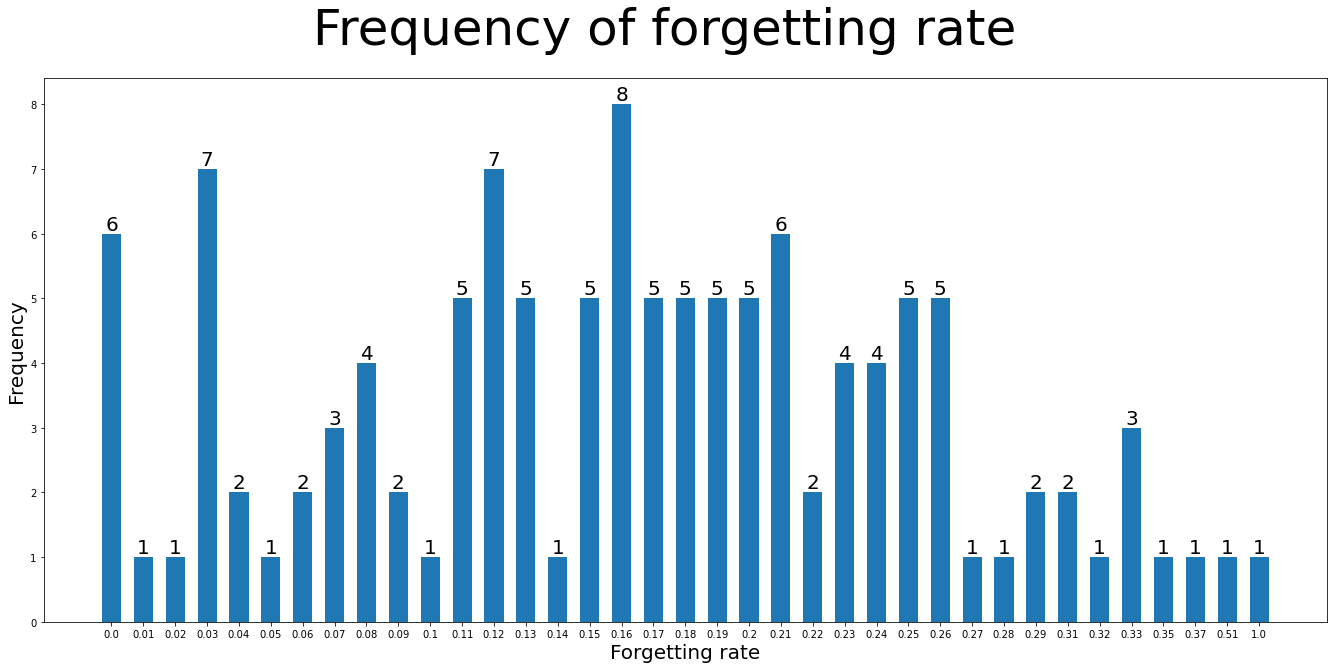

In [504]:
data_frequency(cnt)

In [512]:
kc_slipping = torch.rand(2,3)
kc_slipping

tensor([[0.2122, 0.2995, 0.7124],
        [0.8705, 0.8915, 0.2366]])

In [513]:
kc_slipping * 0.05

tensor([[0.0106, 0.0150, 0.0356],
        [0.0435, 0.0446, 0.0118]])

In [508]:
kc_slipping = torch.rand(2,3) * 0.1
kc_slipping

tensor([[0.0225, 0.0024, 0.0951],
        [0.0428, 0.0066, 0.0616]])

In [519]:
dF = dict()

In [516]:
def calSkillF(cs, rs, sm):
    dr2w, dr = dict(), dict()
    concepts = set()
    for i in range(cs.shape[0]): # batch
        drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
            # print(f"curc: {curc}")
            if j != 0 and sm[i][j-1] != 1:
                break

            if curr == 1:
                dr.setdefault(curc, 0)
                dr[curc] += 1
            elif curr == 0 and curc in drs and drs[curc][-1][0] == 1:
                dr2w.setdefault(curc, 0)
                dr2w[curc] += 1
            drs.setdefault(curc, list())
            drs[curc].append([curr, j])
            concepts.add(curc)
    print(f"dr2w: {dr2w}, dr: {dr}")
    sum = 0
    for c in dr:
        if c not in dr2w:
            dF[c] = 0
        else:
            dF[c] = dr2w[c] / dr[c]
            sum += dr2w[c] / dr[c]
    avgf = sum / len(dr)
    kc2df = {x[0]:x[1] for x in sorted(dF.items(),key=lambda item:int(item[0]))}
    print(f"dF: {dF}, avgf: {avgf}, kc2df: {kc2df}")

    if emb_type.find("mforget") != -1:
        forget_embed = nn.Embedding(len(dF) + 1, embed_l).to(device)
        # print(f"forget_embed: {forget_embed}")

In [518]:
dF

{5: 0.24062909567496724,
 1: 1.0,
 12: 0.24579180973117828,
 15: 0.200355871886121,
 17: 0.1281767955801105,
 3: 0.1920656634746922,
 8: 0.13338139870223503,
 10: 0.18032786885245902,
 28: 0.21009996552912788,
 6: 0.10698365527488855,
 63: 0.22866894197952217,
 51: 0.14866204162537167,
 45: 0.1738327618042733,
 54: 0.02967359050445104,
 53: 0.11121983039791258,
 44: 0.14569313593539704,
 55: 0.16188732967256458,
 11: 0.12282970077576653,
 4: 0.10678251121076233,
 30: 0.11707317073170732,
 32: 0.14893617021276595,
 25: 0.15644868301544052,
 52: 0.19689119170984457,
 2: 0.6666666666666666,
 18: 0.12175470008952552,
 9: 0.1332354560469811,
 21: 0.20146314012380417,
 27: 0.06187624750499002,
 23: 0.12479668786041698,
 14: 0.2605210420841683,
 31: 0.25277093596059114,
 20: 0.16614344361265396,
 24: 0.16536964980544747,
 74: 0.14545454545454545,
 38: 0.2065899581589958,
 13: 0.1806775407779172,
 58: 0.043640897755610975,
 57: 0.13912725944860324,
 86: 0.03373015873015873,
 61: 0.188092345078

In [520]:
calSkillF(cs, rs, sm)

dr2w: {1: 2, 2: 2}, dr: {1: 2, 2: 3}
dF: {1: 1.0, 2: 0.6666666666666666}, avgf: 0.8333333333333333, kc2df: {1: 1.0, 2: 0.6666666666666666}


In [525]:
def calfseqs(cs):
    css, fss, kc2fss = [], [], []
    for i in range(cs.shape[0]): # batch
        curfs = []
        curfs2kc = []
        dlast = dict()
        for j in range(cs.shape[1]): # seqlen
            curc = cs[i][j].detach().cpu().item()
            if curc not in dlast:
                curf = 1
            else:
                delta = j - dlast[curc]
                curf = (1-dF.get(curc, avgf))**delta
            curfs.append([curf])
            curfs2kc.append(kc2df.get(curc, len(dF) + 1))
            dlast[curc] = j
        # print(f"curfs: {curfs}")
        fss.append(curfs)
        kc2fss.append(curfs2kc)
        # assert False
    return torch.tensor(fss).float().to(device), torch.tensor(kc2fss).long().to(device)

In [539]:
dfenzi = dict()
dfenmu = dict()

In [614]:
def calSkillF(cs, rs, sm):
        dr2w, dr = dict(), dict()
        concepts = set()
        for i in range(cs.shape[0]): # batch
            drs = dict()
            for j in range(cs.shape[1]): # seqlen
                curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
                # print(f"curc: {curc}")
                if j != 0 and sm[i][j-1] != 1:
                    break

                if curr == 1:
                    dr.setdefault(curc, 0)
                    dr[curc] += 1
                elif curr == 0 and curc in drs and drs[curc][-1][0] == 1:
                    dr2w.setdefault(curc, 0)
                    dr2w[curc] += 1
                drs.setdefault(curc, list())
                drs[curc].append([curr, j])
                concepts.add(curc)
        print(f"dr2w: {dr2w}, dr: {dr}")
        sum = 0
        for c in dr:
            if c not in dr2w:
                dF[c] = 0
            else:
                dF[c] = dr2w[c] / dr[c]
                dfenzi[c] = dr2w[c]
                dfenmu[c] = dr[c]
                sum += dr2w[c] / dr[c]
        avgf = sum / len(dr)
        print(f"dF: {dF}, avgf: {avgf}")

In [ ]:
def calfseqs(cs, dr2w, dr):
    fss = []
    sub_dr2w, sub_dr = dict(), dict()
    for i in range(cs.shape[0]): # batch
        curfs = []
        sub_drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
            if j != 0 and sm[i][j-1] != 1:
                break
            if curr == 1:
                sub_dr.setdefault(curc, 0)
                sub_dr[curc] += 1
            elif curr == 0 and curc in sub_drs and sub_drs[curc][-1][0] == 1:
                print(f"kc {curc} had right2wrong")
                sub_dr2w.setdefault(curc, 0)
                sub_dr2w[curc] += 1

            if curc not in sub_dr:
                print(f"{curc} not in sub_dr")
                curf = dF.get(curc, avgf)
            else:
                print(f"{curc} in sub_dr")
                curf = (sub_dr2w.get(curc,0) + dr2w[curc])/(sub_dr[curc] + dr[curc])
                curfs.append([curf])
                print(f"kc:{curc}, sub_r2w:{sub_dr2w.get(curc,0)}, dr2w: {dr2w[curc]}, sub_dr:{sub_dr.get(curc,0)}, sub_dr:{dr.get(curc,0)}, original rate:{dF.get(curc)}, rate:{curf}")     
            sub_drs.setdefault(curc, list())
            sub_drs[curc].append([curr, j])        
        fss.append(curfs)
        # assert False
    return torch.tensor(fss).float().to(device)

In [615]:
def calfseqs(cs, rs, dr2w, dr):
    fss = []
    sub_dr2w, sub_dr = dict(), dict()
    for i in range(cs.shape[0]): # batch
        curfs = []
        sub_drs = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
            if curc not in sub_dr:
                curf = 1 - dF.get(curc, avgf)
            else:
                curf = 1 - ((sub_dr2w.get(curc,0) + dr2w[curc])/(sub_dr[curc] + dr[curc]))
            curfs.append([curf]) 
            if curr == 1:
                sub_dr.setdefault(curc, 0)
                sub_dr[curc] += 1
            elif curr == 0 and curc in sub_drs and sub_drs[curc][-1][0] == 1:
                sub_dr2w.setdefault(curc, 0)
                sub_dr2w[curc] += 1
            sub_drs.setdefault(curc, list())
            sub_drs[curc].append([curr, j])        
        fss.append(curfs)
        # assert False
    return torch.tensor(fss).float().to(device)

In [616]:
dF

{1: 1.0, 2: 0.6666666666666666}

In [617]:
dr2w, dr

({3: 580,
  28: 991,
  51: 608,
  45: 527,
  18: 228,
  12: 2280,
  32: 148,
  25: 535,
  8: 283,
  14: 298,
  15: 915,
  61: 631,
  44: 355,
  31: 667,
  5: 1507,
  21: 288,
  22: 319,
  23: 673,
  9: 579,
  1: 958,
  62: 3119,
  57: 626,
  10: 258,
  46: 332,
  72: 755,
  19: 242,
  4: 312,
  2: 556,
  20: 558,
  63: 1141,
  30: 139,
  13: 114,
  0: 363,
  38: 664,
  55: 651,
  56: 696,
  82: 345,
  34: 1011,
  39: 84,
  53: 272,
  42: 17,
  11: 539,
  6: 62,
  52: 252,
  24: 135,
  26: 555,
  67: 251,
  68: 251,
  35: 22,
  49: 638,
  48: 1100,
  81: 203,
  37: 94,
  79: 232,
  60: 421,
  54: 44,
  47: 257,
  75: 45,
  77: 263,
  64: 116,
  50: 173,
  43: 25,
  69: 86,
  76: 134,
  17: 289,
  89: 33,
  71: 111,
  16: 141,
  74: 77,
  59: 7,
  84: 105,
  65: 151,
  66: 178,
  86: 15,
  85: 8,
  58: 57,
  78: 30,
  70: 46,
  83: 92,
  102: 49,
  103: 21,
  112: 35,
  88: 10,
  80: 20,
  91: 8,
  40: 47,
  73: 63,
  105: 43,
  104: 61,
  109: 20,
  29: 16,
  41: 7,
  110: 5,
  106: 16,

In [618]:
calfseqs(cs, rs, dr2w, dr)

tensor([[[0.0000],
         [0.3333],
         [0.8473],
         [0.3333],
         [0.8472],
         [0.8472],
         [0.8747],
         [0.8744],
         [0.8745],
         [0.8742]]])

In [619]:
ori_forget

tensor([[[0.6667],
         [1.0000],
         [0.5000],
         [0.7500],
         [1.0000],
         [0.7500],
         [0.6000],
         [0.8000],
         [0.6667]]])

In [620]:
1 - ori_forget

tensor([[[0.3333],
         [0.0000],
         [0.5000],
         [0.2500],
         [0.0000],
         [0.2500],
         [0.4000],
         [0.2000],
         [0.3333]]])

In [568]:
cs

tensor([[1, 2, 1, 2, 1, 1, 2, 2, 2, 2]])

In [566]:
dr2w

{1: 2, 2: 2}

In [567]:
dr

{1: 2, 2: 3}

In [536]:
# forget
def generate_forget(cs, rs):
    css, fss = [], []
    for i in range(cs.shape[0]): # batch
        curfs = []
        dlast = dict()
        for j in range(cs.shape[1]): # seqlen
            curc, curr = cs[i][j].detach().cpu().item(), rs[i][j].detach().cpu().item()
            # 动态forget, 看前两步历史t-2, t-1
            if emb_type.find("t-2t-1") != -1:
                if curc not in dlast or len(dlast[curc]) < 2:
                    curf = 1-dF.get(curc, avgf)
                elif curc not in dfenzi: # 不存在1-》0 但是可能存在1
                    curf = 1-dF.get(curc, avgf)
                else:
                    # print(f"dF: {dF[curc]}")
                    fenzi = dfenzi[curc]
                    fenmu = dfenmu[curc]
                    if dlast[curc][-2][1] == 1:
                        if dlast[curc][-1][1] == 0:
                            fenzi = fenzi + 1
                        fenmu = fenmu + 1
                    curf = 1- fenzi / fenmu
                curfs.append([curf])
                dlast.setdefault(curc, [])
                dlast[curc].append([j, curr])
            # 动态forget, 看前两步历史t-1, t
            elif emb_type.find("tt-1") != -1:
                dlast.setdefault(curc, [])
                dlast[curc].append([j, curr])
                if len(dlast[curc]) < 2:
                    curf = 1-dF.get(curc, avgf)
                elif curc not in dfenzi: # 不存在1-》0 但是可能存在1
                    curf = 1-dF.get(curc, avgf)
                else:
                    # print(f"dF: {dF[curc]}")
                    fenzi = dfenzi[curc]
                    fenmu = dfenmu[curc]
                    if dlast[curc][-2][1] == 1:
                        if dlast[curc][-1][1] == 0:
                            fenzi = fenzi + 1
                        fenmu = fenmu + 1
                    curf = 1- fenzi / fenmu
                curfs.append([curf])
            else:
                # 静态forget
                if curc not in dlast:
                    curf = 1
                else:
                    # delta = j - dlast[curc]
                    curf = (1-dF.get(curc, avgf))#**delta
                curfs.append([curf])
                dlast.setdefault(curc, [])
                dlast[curc].append([j, curr])


        # print(f"curfs: {curfs}")
        fss.append(curfs)
        # assert False
    return torch.tensor(fss).float().to(device)

In [541]:
calSkillF(cs, rs, sm)

dr2w: {1: 2, 2: 2}, dr: {1: 2, 2: 3}
dF: {1: 1.0, 2: 0.6666666666666666}, avgf: 0.8333333333333333


In [542]:
dfenzi, dfenmu

({1: 2, 2: 2}, {1: 2, 2: 3})

In [537]:
cs = torch.tensor([[1,2,1,2,1,1,2,2,2,2]])
rs = torch.tensor([[1,0,0,1,1,0,0,1,0,1]])
cs,rs

(tensor([[1, 2, 1, 2, 1, 1, 2, 2, 2, 2]]),
 tensor([[1, 0, 0, 1, 1, 0, 0, 1, 0, 1]]))

In [555]:
emb_type = "tt-1"
generate_forget(cs, rs)

tensor([[[0.0000],
         [0.3333],
         [0.0000],
         [0.3333],
         [0.0000],
         [0.0000],
         [0.2500],
         [0.3333],
         [0.2500],
         [0.3333]]])

In [556]:
emb_type = "t-2t-1"
generate_forget(cs, rs)

tensor([[[0.0000],
         [0.3333],
         [0.0000],
         [0.3333],
         [0.0000],
         [0.0000],
         [0.3333],
         [0.2500],
         [0.3333],
         [0.2500]]])

In [547]:
emb_type = "xxx"
generate_forget(cs, rs)

tensor([[[1.0000],
         [1.0000],
         [0.0000],
         [0.3333],
         [0.0000],
         [0.0000],
         [0.3333],
         [0.3333],
         [0.3333],
         [0.3333]]])

In [553]:
ori_forget = torch.tensor([[[0.6667],
         [1.0000],
         [0.5000],
         [0.7500],
         [1.0000],
         [0.7500],
         [0.6000],
         [0.8000],
         [0.6667]]])

In [554]:
1- ori_forget

tensor([[[0.3333],
         [0.0000],
         [0.5000],
         [0.2500],
         [0.0000],
         [0.2500],
         [0.4000],
         [0.2000],
         [0.3333]]])

In [557]:
kc_guess = torch.rand(2,3,1)
kc_guess

tensor([[[0.7437],
         [0.7705],
         [0.1543]],

        [[0.1344],
         [0.6806],
         [0.3561]]])

In [560]:
alpha = torch.rand(2,3,1)
alpha

tensor([[[0.7554],
         [0.9377],
         [0.7776]],

        [[0.0241],
         [0.2597],
         [0.1509]]])

In [562]:
2 * alpha

tensor([[[1.5108],
         [1.8754],
         [1.5552]],

        [[0.0481],
         [0.5193],
         [0.3018]]])

In [558]:
1 - kc_guess

tensor([[[0.2563],
         [0.2295],
         [0.8457]],

        [[0.8656],
         [0.3194],
         [0.6439]]])

In [583]:
dic = {i:i+2 for i in range(3)}
dic

{0: 2, 1: 3, 2: 4}

In [592]:
list(dic.values)

TypeError: 'builtin_function_or_method' object is not iterable

In [589]:
np.mean(dic.values())

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

# 所有数据(train+valid+test)

In [593]:
dr2w = {3: 702, 28: 1219, 51: 750, 45: 659, 18: 272, 12: 2935, 32: 189, 25: 689, 8: 370, 14: 390, 15: 1126, 61: 774, 44: 433, 31: 821, 5: 1836, 21: 358, 22: 388, 23: 844, 9: 726, 1: 1206, 62: 3937, 57: 762, 10: 319, 46: 409, 72: 957, 19: 305, 4: 381, 2: 676, 20: 688, 63: 1407, 30: 168, 13: 144, 0: 444, 38: 790, 55: 796, 56: 840, 82: 406, 34: 1206, 39: 98, 53: 341, 42: 22, 11: 665, 6: 72, 52: 304, 24: 170, 26: 680, 67: 289, 68: 290, 35: 25, 49: 806, 48: 1381, 81: 256, 37: 113, 79: 277, 60: 501, 54: 50, 47: 317, 75: 57, 77: 331, 64: 138, 50: 202, 43: 30, 69: 99, 76: 158, 17: 348, 89: 38, 71: 127, 16: 158, 74: 88, 59: 11, 84: 132, 65: 193, 66: 229, 86: 17, 85: 9, 58: 70, 78: 35, 70: 63, 83: 124, 102: 70, 103: 23, 112: 45, 88: 13, 80: 22, 91: 11, 40: 55, 73: 72, 105: 48, 104: 62, 109: 27, 29: 17, 41: 12, 110: 9, 106: 16, 96: 14, 27: 31, 97: 12, 118: 61, 120: 20, 7: 7, 90: 18, 119: 17, 117: 5, 87: 4, 111: 6, 92: 2, 93: 2, 94: 2, 95: 2, 107: 1, 122: 9, 33: 4, 113: 2, 115: 1, 114: 1}

In [594]:
np.mean(list(dr2w.values()))

359.6434782608696

In [595]:
dr = {5: 7630, 1: 7664, 12: 11941, 15: 5620, 17: 2715, 3: 3655, 8: 2774, 10: 1769, 28: 5802, 6: 673, 63: 6153, 51: 5045, 45: 3791, 54: 1685, 53: 3066, 44: 2972, 55: 4917, 11: 5414, 4: 3568, 30: 1435, 32: 1269, 25: 4404, 52: 1544, 2: 5506, 18: 2234, 9: 5449, 21: 1777, 27: 501, 23: 6763, 14: 1497, 31: 3248, 20: 4141, 24: 1028, 74: 605, 38: 3824, 13: 797, 58: 1604, 57: 5477, 86: 504, 61: 4115, 46: 1583, 47: 1508, 22: 2117, 48: 3902, 49: 2451, 62: 16458, 19: 1162, 37: 1045, 42: 171, 72: 2578, 7: 524, 43: 231, 26: 2766, 64: 861, 0: 2902, 16: 1527, 65: 945, 66: 1109, 67: 1127, 68: 1127, 56: 4405, 69: 1188, 70: 545, 71: 521, 73: 415, 82: 2143, 81: 871, 91: 245, 83: 785, 78: 418, 79: 1215, 84: 828, 76: 715, 77: 1072, 75: 778, 33: 262, 59: 350, 34: 4147, 35: 384, 39: 600, 40: 480, 50: 1275, 60: 2596, 29: 187, 41: 57, 90: 218, 80: 427, 100: 106, 96: 119, 97: 128, 36: 17, 89: 155, 88: 177, 85: 52, 112: 143, 102: 219, 103: 45, 109: 124, 122: 36, 99: 21, 87: 48, 92: 64, 93: 64, 94: 64, 95: 64, 105: 230, 104: 254, 110: 39, 111: 34, 106: 70, 118: 183, 113: 11, 119: 60, 117: 25, 120: 74, 107: 16, 121: 5, 98: 4, 116: 2, 115: 3, 114: 1}

In [596]:
np.mean(list(dr.values()))

1821.9338842975208

In [ ]:
avg.forgetting rate: 0.17090019381263089

# 训练集+验证集(train+valid)

In [601]:
dr2w = {3: 580, 28: 991, 51: 608, 45: 527, 18: 228, 12: 2280, 32: 148, 25: 535, 8: 283, 14: 298, 15: 915, 61: 631, 44: 355, 31: 667, 5: 1507, 21: 288, 22: 319, 23: 673, 9: 579, 1: 958, 62: 3119, 57: 626, 10: 258, 46: 332, 72: 755, 19: 242, 4: 312, 2: 556, 20: 558, 63: 1141, 30: 139, 13: 114, 0: 363, 38: 664, 55: 651, 56: 696, 82: 345, 34: 1011, 39: 84, 53: 272, 42: 17, 11: 539, 6: 62, 52: 252, 24: 135, 26: 555, 67: 251, 68: 251, 35: 22, 49: 638, 48: 1100, 81: 203, 37: 94, 79: 232, 60: 421, 54: 44, 47: 257, 75: 45, 77: 263, 64: 116, 50: 173, 43: 25, 69: 86, 76: 134, 17: 289, 89: 33, 71: 111, 16: 141, 74: 77, 59: 7, 84: 105, 65: 151, 66: 178, 86: 15, 85: 8, 58: 57, 78: 30, 70: 46, 83: 92, 102: 49, 103: 21, 112: 35, 88: 10, 80: 20, 91: 8, 40: 47, 73: 63, 105: 43, 104: 61, 109: 20, 29: 16, 41: 7, 110: 5, 106: 16, 96: 10, 27: 25, 97: 8, 118: 36, 120: 5, 7: 6, 90: 11, 119: 10, 117: 4, 87: 2, 111: 4, 92: 1, 93: 1, 94: 1, 95: 1, 107: 1, 122: 9, 33: 2, 113: 1}

In [603]:
np.mean(list(dr2w.values()))

295.7699115044248

In [602]:
dr = {5: 6215, 1: 6274, 12: 9382, 15: 4638, 17: 2260, 3: 3075, 8: 2209, 10: 1440, 28: 4781, 6: 534, 63: 5076, 51: 4194, 45: 3121, 54: 1393, 53: 2530, 44: 2453, 55: 4040, 11: 4394, 4: 2914, 30: 1202, 32: 1028, 25: 3501, 52: 1281, 2: 4435, 18: 1872, 9: 4354, 21: 1418, 27: 409, 23: 5380, 14: 1219, 31: 2660, 20: 3434, 24: 820, 74: 508, 38: 3235, 13: 644, 58: 1360, 57: 4463, 86: 417, 61: 3431, 46: 1273, 47: 1228, 22: 1763, 48: 3207, 49: 1984, 62: 13275, 19: 946, 37: 867, 42: 143, 72: 2081, 7: 442, 43: 190, 26: 2222, 64: 701, 0: 2420, 16: 1311, 65: 765, 66: 876, 67: 946, 68: 946, 56: 3653, 69: 1010, 70: 430, 71: 443, 73: 362, 82: 1788, 81: 713, 91: 211, 83: 642, 78: 350, 79: 1008, 84: 687, 76: 609, 77: 857, 75: 653, 33: 215, 59: 296, 34: 3434, 35: 323, 39: 511, 40: 401, 50: 1078, 60: 2196, 29: 160, 41: 39, 90: 168, 80: 365, 100: 95, 96: 97, 97: 106, 36: 17, 89: 135, 88: 151, 85: 49, 112: 117, 102: 158, 103: 43, 109: 100, 122: 32, 99: 16, 87: 31, 92: 53, 93: 53, 94: 53, 95: 53, 105: 200, 104: 252, 110: 27, 111: 29, 106: 70, 118: 119, 113: 7, 119: 36, 117: 20, 120: 36, 107: 13, 121: 3, 98: 4}

In [604]:
np.mean(list(dr.values()))

1528.449152542373

In [ ]:
avg.forgetting rate: 0.1589596963915976

# 仅训练集

In [597]:
dr2w = {3: 465, 28: 810, 51: 492, 45: 412, 18: 192, 12: 1828, 32: 114, 25: 417, 8: 224, 14: 241, 15: 708, 61: 481, 44: 285, 31: 487, 5: 1243, 21: 236, 22: 247, 23: 537, 9: 482, 1: 763, 62: 2546, 57: 503, 10: 226, 46: 233, 72: 598, 19: 194, 4: 245, 2: 461, 20: 434, 63: 917, 30: 101, 13: 93, 0: 290, 38: 532, 55: 524, 56: 542, 82: 271, 34: 819, 39: 66, 53: 220, 42: 16, 11: 451, 6: 49, 52: 208, 24: 105, 26: 455, 67: 189, 68: 189, 35: 17, 49: 523, 48: 927, 81: 164, 37: 77, 79: 194, 60: 343, 54: 36, 47: 191, 75: 38, 77: 216, 64: 95, 50: 143, 43: 15, 69: 68, 76: 112, 17: 231, 89: 29, 71: 103, 16: 121, 74: 60, 59: 6, 84: 84, 65: 132, 66: 147, 86: 13, 85: 7, 58: 50, 78: 25, 70: 33, 83: 72, 102: 45, 103: 21, 112: 23, 88: 10, 80: 16, 91: 7, 40: 37, 73: 48, 105: 42, 104: 61, 109: 19, 29: 14, 41: 6, 110: 3, 106: 16, 96: 8, 27: 16, 97: 6, 118: 23, 120: 4, 7: 5, 90: 9, 119: 8, 117: 4, 87: 2, 111: 2, 92: 1, 93: 1, 94: 1, 95: 1, 107: 1, 122: 5, 33: 2}

In [600]:
np.mean(list(dr2w.values()))

240.0

In [598]:
dr = {5: 5002, 1: 5052, 12: 7617, 15: 3642, 17: 1797, 3: 2491, 8: 1735, 10: 1209, 28: 3829, 6: 433, 63: 4043, 51: 3396, 45: 2504, 54: 1129, 53: 2033, 44: 1962, 55: 3299, 11: 3610, 4: 2355, 30: 905, 32: 800, 25: 2711, 52: 1044, 2: 3635, 18: 1603, 9: 3528, 21: 1132, 27: 292, 23: 4318, 14: 969, 31: 2050, 20: 2746, 24: 621, 74: 401, 38: 2609, 13: 530, 58: 1121, 57: 3645, 86: 343, 61: 2708, 46: 954, 47: 940, 22: 1387, 48: 2676, 49: 1664, 62: 10868, 19: 769, 37: 718, 42: 119, 72: 1652, 7: 361, 43: 150, 26: 1843, 64: 583, 0: 1968, 16: 1084, 65: 650, 66: 717, 67: 733, 68: 733, 56: 2939, 69: 824, 70: 347, 71: 388, 73: 288, 82: 1432, 81: 562, 91: 162, 83: 523, 78: 287, 79: 843, 84: 558, 76: 487, 77: 687, 75: 536, 33: 177, 59: 229, 34: 2801, 35: 263, 39: 405, 40: 317, 50: 883, 60: 1788, 29: 127, 41: 28, 90: 136, 80: 301, 100: 75, 96: 73, 97: 83, 36: 14, 89: 116, 88: 127, 85: 38, 112: 78, 102: 138, 103: 43, 109: 88, 122: 15, 99: 15, 87: 28, 92: 48, 93: 48, 94: 48, 95: 48, 105: 199, 104: 252, 110: 20, 111: 22, 106: 70, 118: 88, 113: 6, 119: 26, 117: 19, 120: 27, 107: 13, 121: 3, 98: 1}

In [599]:
np.mean(list(dr.values()))

1233.9406779661017

In [ ]:
avg.forgetting rate: 0.15802669884159973

In [621]:
a = torch.rand(1,4)
a

tensor([[0.7458, 0.1572, 0.7284, 0.0727]])

In [622]:
b = torch.rand(4,4,)
b

tensor([[0.2260, 0.9545, 0.8907, 0.7281],
        [0.8196, 0.4135, 0.7041, 0.0499],
        [0.4269, 0.3954, 0.3202, 0.8358],
        [0.6668, 0.9995, 0.6574, 0.5978]])

In [623]:
torch.matmul(a,b)

tensor([[0.6569, 1.1376, 1.0560, 1.2032]])